# Exploring data to see if it's suitable for forcasting in (S)ARIMA... and choosing parameters
### ARIMA(p,d,q)()m
### ARIMA(p,1,q)()m
Manually selecting parameters, as auto-arima uses AIC, which can be highly dependent on the data inputted. Due to not collecting enough information (currently), risk of parameters 'overfitting' to data.

In [158]:
from data_preprocess import pre_process
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [159]:
df = pre_process(csv_data_file_path='./Data/bbtable_data.csv', resample_period='H')
df = df.iloc[700:-1300] # Last values are empty for the holidays, so barely any attendance (ignore due to small data size)

In [160]:
print(adfuller(df))
# Statistically test for stationary (weak) data, as prerequisite for ARIMA
# Critical value if within range of CI, hence we don't have evidence to reject H0 (data is not stationary)

(-2.389677406385393, 0.14467110566023378, 19, 503, {'1%': -3.4434175660489905, '5%': -2.8673031724657454, '10%': -2.5698395516760275}, 5760.663619669136)


Not stationary, so we apply differencing first.

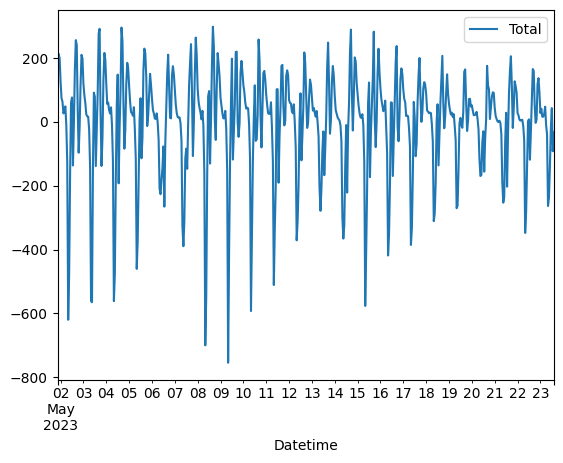

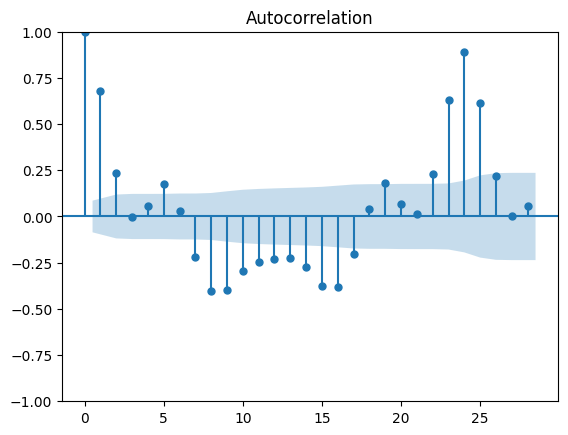

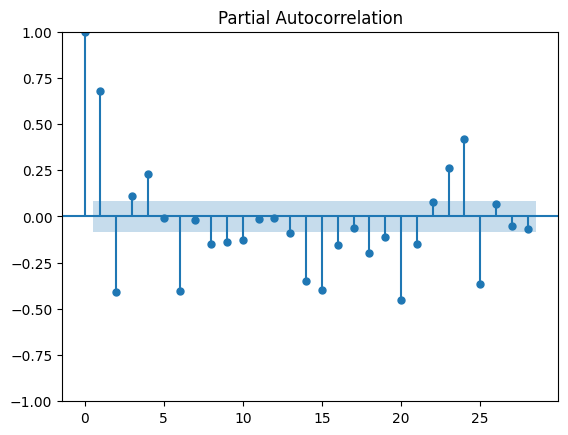

(-21.721996186759604, 0.0, 19, 502, {'1%': -3.4434437319767452, '5%': -2.8673146875484368, '10%': -2.569845688481135}, 5586.691226046961)


In [161]:
df_diff = df.diff().iloc[1:]
df_diff.plot()
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()
print(adfuller(df_diff))# Makes a statistically significant different!

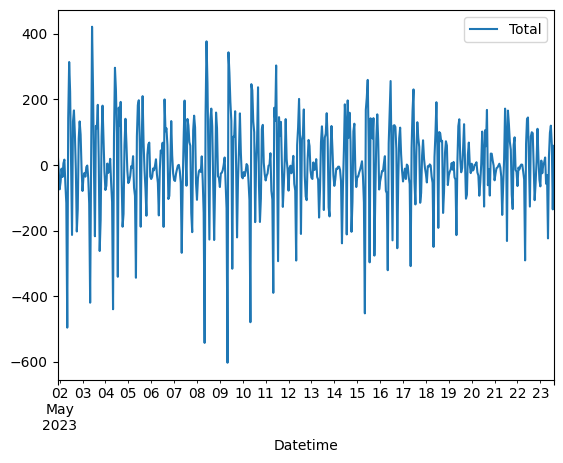

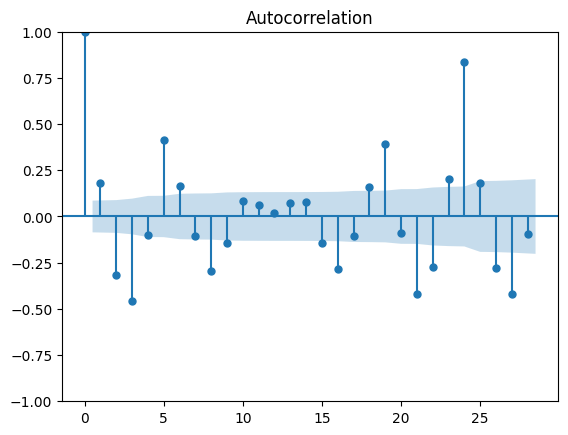

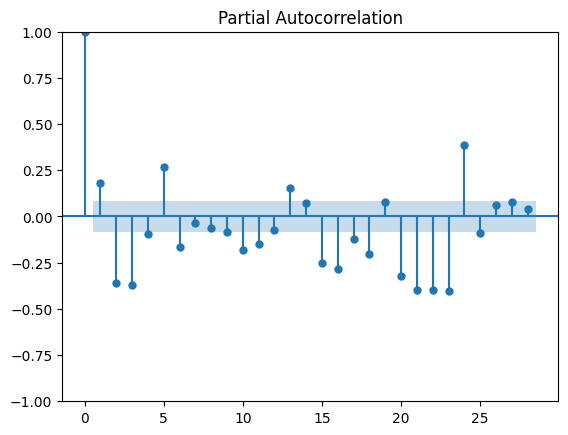

In [163]:
df_diff_2 = df_diff.diff().iloc[1:] # difference twice
df_diff_2.plot()
plot_acf(df_diff_2)
plot_pacf(df_diff_2)
plt.show()
# Could difference twice, but would add extra noise as seen by plot and also we already have correctly differenced data as per the Dicky-Fuller test.

As test statistic for a single differencing is less than the  critical value for a significance level of 0.5, we have sufficient evidence to reject the null (being not stationary).

Note: we only did 1 differencing, so d = 1

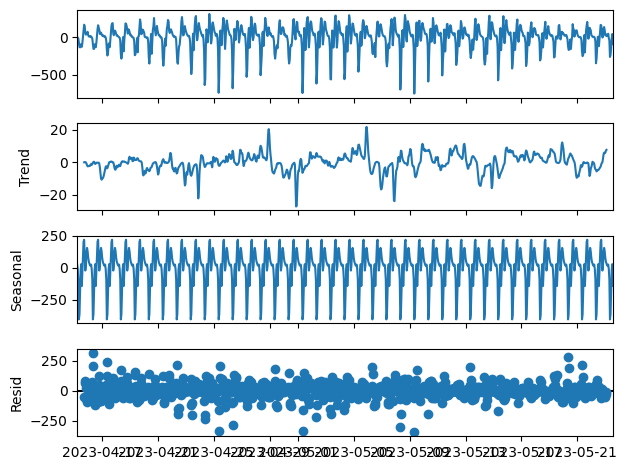

In [135]:
seasonal_decompose(df_diff).plot()
plt.show()
# Data visually seems to follow stationary patterns
# Very strong seasonal component, (S)ARIMA